In [8]:
import glob
import numpy as np
from skimage.color import rgb2hsv
from skimage.io import imread

def color_feature_extraction(im, dim=64):
    hsv = rgb2hsv(im)
    hue = hsv[:,:,0].ravel()
    hue_hist, _ = np.histogram(hue, dim)
    hue_hist = hue_hist / np.max(hue_hist)
    return hue_hist

filenames = glob.glob("./data/circle/train/*.png")
circle_features = []
for filename in filenames:
    im = imread(filename)
    f = color_feature_extraction(im)
    circle_features.append(f)

circle_train = np.array(circle_features)

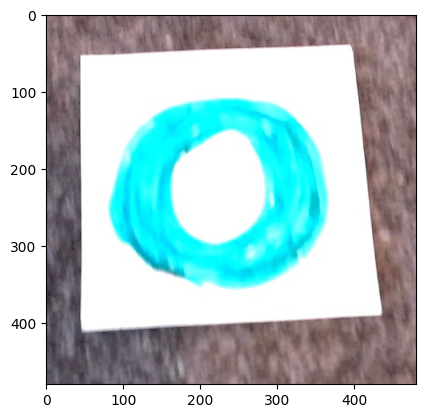

In [9]:
import matplotlib.pyplot as plt

im = imread("./data/circle/train/circle_0.png")
plt.imshow(im)
plt.show()

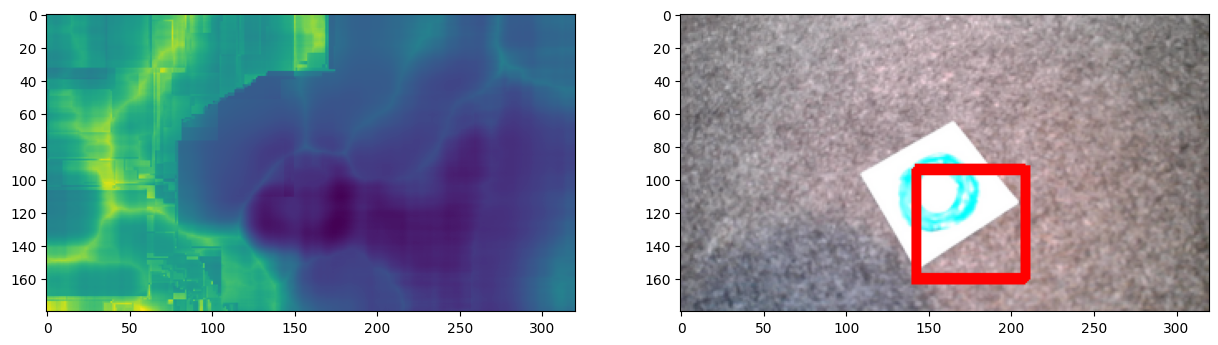

In [10]:
from scipy import ndimage
from skimage.draw import rectangle_perimeter
from skimage.transform import resize

# Read an image frame to perform detection on.
im = imread("data/frames/frame_0000.png")
im_sm = resize(im, (im.shape[0] // 2, im.shape[1] // 2))[:,:,:3]
_hsv = rgb2hsv(im_sm[:,:,:3])
frame = _hsv[:,:,0]

# Calculate distances between a given image patch and the training circle images
dim = 64
def circle_dist(patch):
    hue = patch.ravel()
    hue_hist, _ = np.histogram(hue, dim)
    feature = hue_hist / np.max(hue_hist)
    dist = np.linalg.norm(circle_train - feature)
    return np.min(dist)

# Linear filtering with a 64x64 patch
patch_size = 64
res_circle = ndimage.generic_filter(frame, circle_dist, size=(patch_size, patch_size))

# Detection with a distance threshold
dist_thershold = 8
idx = np.argwhere(res_circle < dist_thershold)

# Visualize the result
plotted = im_sm.copy()
for i in idx:
    start = i[0] - patch_size / 2, i[1] - patch_size / 2
    end = start[0] + patch_size, start[1] + patch_size
    rr, cc = rectangle_perimeter(start, end, shape=im_sm.shape)
    plotted[rr, cc] = np.array([1., 0, 0])

fig, axs = plt.subplots(1, 2, figsize=(15, 15))

axs[0].imshow(res_circle)
axs[1].imshow(plotted)

plt.show()